# Tugas UAS : Prediksi data Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/wahyuarilsaputra/dataset/main/BBTN.JK.csv')
dataFrame = pd.DataFrame(data)
dataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,1495.0,1510.0,1470.0,1490.0,1438.684570,13594300
1,2022-06-16,1500.0,1515.0,1495.0,1500.0,1448.340210,25436000
2,2022-06-17,1485.0,1495.0,1470.0,1480.0,1429.029053,17891900
3,2022-06-20,1500.0,1500.0,1455.0,1465.0,1414.545654,13066800
4,2022-06-21,1475.0,1495.0,1475.0,1485.0,1433.856812,10315100
...,...,...,...,...,...,...,...
242,2023-06-08,1315.0,1320.0,1295.0,1305.0,1305.000000,17533200
243,2023-06-09,1315.0,1320.0,1290.0,1300.0,1300.000000,13335000
244,2023-06-12,1305.0,1310.0,1280.0,1310.0,1310.000000,24541800
245,2023-06-13,1310.0,1315.0,1265.0,1270.0,1270.000000,36874200


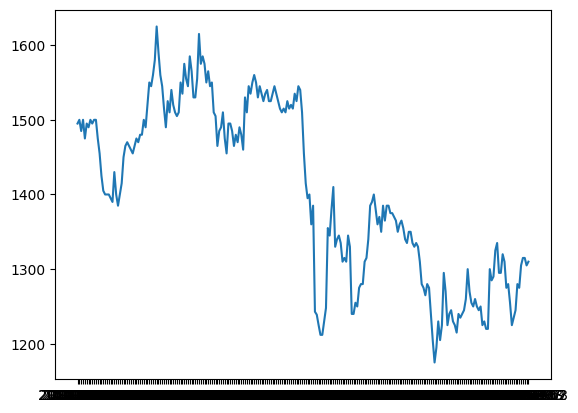

In [3]:
X = data['Date']
y = data['Open']
y = y.astype(int)
plt.plot(X[:-1],y[:-1])

In [4]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # Mencari n akhir
    end_ix = i + n_steps
    # Memeriksa urutan terluar dari data
    if end_ix > len(sequence)-1:
      break
    # Menambahkan bagian input dan output
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    # print(seq_x, seq_y)
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

# Menentukan Waktu dari data time series
jmlh_X = 4
print('Shapes Target = ',y.shape)
#Split data fitur dan target
X, y = split_sequence(y, jmlh_X)
print('Shapes X = ',X.shape)
print('Shapes Y = ',y.shape)

Shapes Target =  (247,)
Shapes X =  (243, 4)
Shapes Y =  (243,)


In [5]:
newFitur = pd.DataFrame(X, columns=['t-'+str(i+1) for i in range(jmlh_X-1, -1,-1)])
newTarget = pd.DataFrame(y, columns=['Data Prediksi'])

In [6]:
newData = pd.concat([newFitur,newTarget], axis=1)
newData

,t-4,t-3,t-2,t-1,Data Prediksi
0,1495,1500,1485,1500,1475
1,1500,1485,1500,1475,1495
2,1485,1500,1475,1495,1490
3,1500,1475,1495,1490,1500
4,1475,1495,1490,1500,1495
...,...,...,...,...,...
238,1245,1280,1275,1305,1315
239,1280,1275,1305,1315,1315
240,1275,1305,1315,1315,1305
241,1305,1315,1315,1305,1310


## Normalisasi Fitur

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(newFitur)
# print(X_norm)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
# print(X_pca)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
clf

DecisionTreeRegressor()

In [11]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_pred_tree, y_test)

0.02166899579863957

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_bayes = gnb.fit(X_train, y_train).predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_pred_bayes, y_test)

0.01843701868309073

## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_pred_knn, y_test)

0.023037170326235576

## MLP

In [16]:
from sklearn.neural_network import MLPClassifier

In [17]:
# X, y = make_classification(n_samples=51, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_pred_mlp, y_test)

0.025631218942568385

In [19]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


array([47.58050655, 22.09422255])

In [20]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_pred_mlp, y_test)

0.025631218942568385

## Import Model

In [21]:
import pickle

model_tree = 'tree_model.pkl'
with open(model_tree, 'wb') as f:
    pickle.dump(clf, f)
model_bayes = 'bayes_model.pkl'
with open(model_bayes, 'wb') as f:
    pickle.dump(gnb, f)
model_knn = 'knn_model.pkl'
with open(model_knn, 'wb') as f:
    pickle.dump(neigh, f)
model_mlp = 'mlp_model.pkl'
with open(model_mlp, 'wb') as f:
    pickle.dump(mlp, f)
model_mlpReg = 'mlp_modelReg.pkl'
with open(model_mlpReg, 'wb') as f:
    pickle.dump(regr, f)